In [137]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy
import sklearn

In [138]:
df = pd.read_csv("amazon_cells_labelled.txt", error_bad_lines=False, header=None, sep="\t")

In [139]:
df.tail(45)

,0,1
955,Buttons are too small.,0
956,Just reading on the specs alone makes you say ...,1
957,Love it.. Great armband.,1
958,I really like this product over the Motorola b...,1
959,"However, the keypads are so tinny that I somet...",0
960,I exchanged the sony ericson z500a for this an...,1
961,I was very impressed with the price of the cases.,1
962,Also makes it easier to hold on to.,1
963,I use this product in a motor control center w...,1
964,It's pretty easy.,1


In [140]:
df.columns = ["message", "negative review"]

In [141]:
df.head()

,message,negative review
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [142]:
df["negative review"] = (df["negative review"] == 0)

In [143]:
df.head()

,message,negative review
0,So there is no way for me to plug it in here i...,True
1,"Good case, Excellent value.",False
2,Great for the jawbone.,False
3,Tied to charger for conversations lasting more...,True
4,The mic is great.,False


In [144]:
bad_words = ["waste", "awful", "cheap", "problem", "mislead", "lousy", "disappointed", "junk", "unsatisfactory"]
good_words = ["excellent", "great", "best", "amazing", "impressed", "love"]

for word in bad_words:
    df[str(word)] = df["message"].str.contains(str(word), case=False)

  

In [145]:
for word in good_words:
    df["no", str(word)] = df["message"].str.contains(str(word), case=False)

def neg_words(c):
    bad_words = ["waste", "awful", "cheap", "problem", "mislead", "lousy", "disappointed", "junk", "unsatisfactory"]
    for word in bad_words:
        if str(word) in str(c["message"]):
            return True
        else:
            return False
        

data["negative_words"] = data.apply(neg_words, axis=1)

In [146]:
df.columns

Index([          'message',   'negative review',             'waste',
                   'awful',             'cheap',           'problem',
                 'mislead',             'lousy',      'disappointed',
                    'junk',    'unsatisfactory', ('no', 'excellent'),
           ('no', 'great'),      ('no', 'best'),   ('no', 'amazing'),
       ('no', 'impressed'),      ('no', 'love')],
      dtype='object')

In [147]:
df.iloc[:, 11:16] = (df.iloc[:, 11:16] == False)

#data["negative review"] = (data["negative review"] == 0)

In [148]:
df.tail(30)

,message,negative review,waste,awful,cheap,problem,mislead,lousy,disappointed,junk,unsatisfactory,"(no, excellent)","(no, great)","(no, best)","(no, amazing)","(no, impressed)","(no, love)"
970,I plugged it in only to find out not a darn th...,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False
971,Excellent product.,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False
972,Earbud piece breaks easily.,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False
973,Lousy product.,True,False,False,False,False,False,True,False,False,False,True,True,True,True,True,False
974,This phone tries very hard to do everything bu...,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False
975,It is the best charger I have seen on the mark...,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False
976,SWEETEST PHONE!!!,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False
977,":-)Oh, the charger seems to work fine.",False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False
978,It fits so securely that the ear hook does not...,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False
979,Not enough volume.,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False


def posi_words(c):
    good_words = ["excellent", "great", "best", "amazing", "impressed", "love"]
    for word in good_words:
        if str(word) in str(c["message"]):
            return False
        else:
            return True
        

data["no_positive_words"] = data.apply(posi_words, axis=1)

In [149]:
df.head(10)

,message,negative review,waste,awful,cheap,problem,mislead,lousy,disappointed,junk,unsatisfactory,"(no, excellent)","(no, great)","(no, best)","(no, amazing)","(no, impressed)","(no, love)"
0,So there is no way for me to plug it in here i...,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False
1,"Good case, Excellent value.",False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False
2,Great for the jawbone.,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False
3,Tied to charger for conversations lasting more...,True,False,False,False,True,False,False,False,False,False,True,True,True,True,True,False
4,The mic is great.,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False
5,I have to jiggle the plug to get it to line up...,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False
6,If you have several dozen or several hundred c...,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False
7,If you are Razr owner...you must have this!,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False
8,"Needless to say, I wasted my money.",True,True,False,False,False,False,False,False,False,False,True,True,True,True,True,False
9,What a waste of money and time!.,True,True,False,False,False,False,False,False,False,False,True,True,True,True,True,False


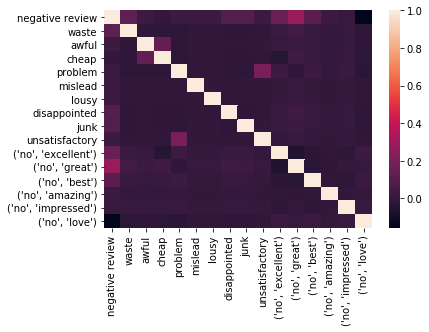

In [150]:
sns.heatmap(df.corr())

In [151]:
data = df.iloc[:, 2:]
target = df["negative review"]

In [152]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total of {} points: {}".format(data.shape[0], (target != y_pred).sum()))

TypeError: fit() missing 1 required positional argument: 'y'